TASK 1 - • Predict confirmed COVID-19 cases among suspected cases.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset 
df=pd.read_excel('Brazil covid 19.xlsx')
df.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#pandas
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [4]:
df.shape

(5644, 111)

In [5]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [6]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain 5644 entries 

mean- Mean of Values here mean of each column is found ie, mean of Patient age quantile column=101.064806 , Patient addmited to regular ward is 437.182418, etc

std- Standard Deviation of the Values here standard deviation for Patient age quantile is 5.777903 ,  Patient addmited to regular ward  is 0.117489  etc

min- Minimum value here it shows the min value for Patient age quantile is 0 ,   Patient addmited to regular ward is 0 etc

max- Maximum value it shows the max value for Patient age quantile  is 19 ,   Patient addmited to regular ward is 1 .

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for  Patient age quantile is 4 , 9 , 14 respectively.

In [8]:
# understand data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,5644,5644,001646dfe0e98df,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
Hematocrit,603,NaN,NaN,NaN,-2.18621e-09,1.00083,-4.50142,-0.518807,0.053407,0.717175,2.6627
Hemoglobin,603,NaN,NaN,NaN,-1.60132e-08,1.00083,-4.3456,-0.586244,0.040316,0.729532,2.67187
Platelets,602,NaN,NaN,NaN,-3.535e-10,1.00083,-2.55243,-0.605346,-0.121716,0.531498,9.53203
Mean platelet volume,599,NaN,NaN,NaN,7.43814e-09,1.00084,-2.45757,-0.662483,-0.101517,0.683835,3.71305


In [9]:
df.info()
#info function gives us a concise summary of the dataframe; it shows us the datatypes and number of non null values
#it tells us that there are 70 float, 4 integer and 37 object valued columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [10]:
df.isnull().sum()
#lets check the null values; here it is clear that there are lots of null values

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

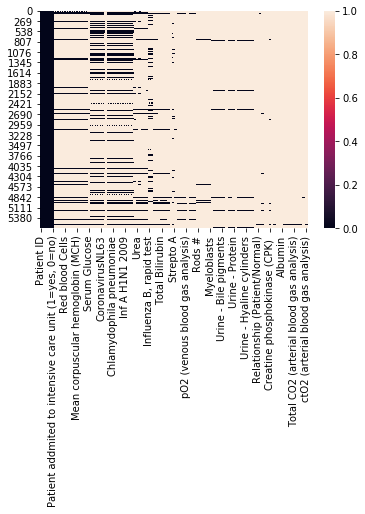

In [11]:
sns.heatmap(df.isnull())
#using heatmap lets see the null value; there are plenty of null values.

In [14]:
#collect columns with good data
df_null=df.isnull().sum()
good_columns = df_null[df_null==0].reset_index()
good_columns

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0
5,Patient addmited to intensive care unit (1=yes...,0


In [15]:
(df_null/df.shape[0]*100).round(2)


Patient ID                                                 0.00
Patient age quantile                                       0.00
SARS-Cov-2 exam result                                     0.00
Patient addmited to regular ward (1=yes, 0=no)             0.00
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.00
Patient addmited to intensive care unit (1=yes, 0=no)      0.00
Hematocrit                                                89.32
Hemoglobin                                                89.32
Platelets                                                 89.33
Mean platelet volume                                      89.39
Red blood Cells                                           89.33
Lymphocytes                                               89.33
Mean corpuscular hemoglobin concentration (MCHC)          89.33
Leukocytes                                                89.33
Basophils                                                 89.33
Mean corpuscular hemoglobin (MCH)       

In [16]:
#create a new dataframe with good columns
df1=df[good_columns['index']]
df1.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [17]:
# check correlation
df1.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
Patient age quantile,1.000000,0.046166,0.015736,-0.035772
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000


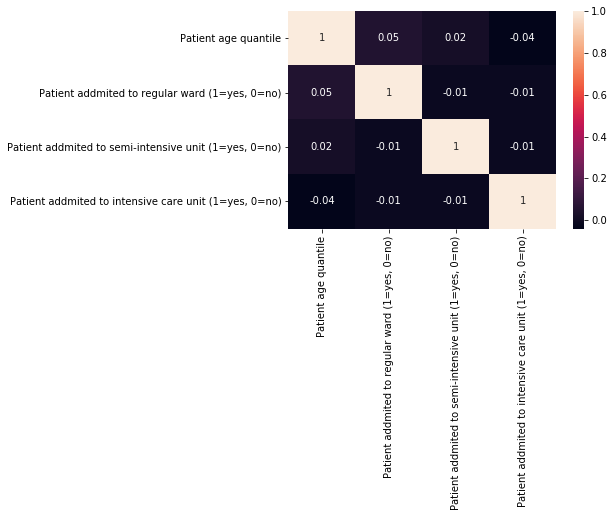

In [18]:
# check correlation with graphcs...
ax = sns.heatmap(df1.corr().round(2), annot=True)
plt.show()

In [19]:
#The correlation with these columns is poor

#We will check the data of all columns and do some steps:

#fix it if necessary.
#remove some columns with there are not relevance.
#create dummy variable

In [21]:
# grouping data by result to check balance
df.groupby("SARS-Cov-2 exam result").count()


,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,520,520,519,518,519,519,519,519,519,519,519,519,518,519,175,1242,1242,1242,1240,1240,1240,0,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,438,338,436,362,313,312,758,758,185,186,123,142,142,142,115,44,318,35,116,116,116,116,1,116,116,116,88,88,88,88,88,88,49,58,58,58,58,48,1,58,57,50,0,58,58,58,56,57,58,58,0,76,110,75,0,3,81,21,14,5,0,13,14,14,14,14,14,14,14,11,19,14
positive,558,558,558,558,558,83,83,83,81,83,83,83,83,83,83,83,83,83,83,33,112,112,112,112,112,112,0,112,112,112,112,112,112,112,112,112,112,112,75,59,70,62,58,58,62,62,40,40,30,40,40,40,29,6,14,5,20,20,20,20,0,20,20,20,9,9,9,9,9,9,11,12,12,12,12,9,0,12,12,10,0,12,12,12,11,12,12,12,0,15,23,26,0,0,23,2,13,3,0,0,13,13,13,13,13,13,13,9,1,13


In [22]:
df[['Patient ID','SARS-Cov-2 exam result']].groupby("SARS-Cov-2 exam result").count()

,Patient ID
SARS-Cov-2 exam result,
negative,5086
positive,558


In [23]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [24]:
#create a list of columns with datatype == 'object'
x1=[]
for c in df.columns:
    x=df[c].dtype
    if x == 'object' and c != 'Patient ID':
        x1.append(c)
print(x1)

['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']


In [25]:
#check unique values on list
for a in x1:
    print('analyzing column: ', a)
    print(df[a].unique())
    print()

analyzing column:  SARS-Cov-2 exam result
['negative' 'positive']

analyzing column:  Respiratory Syncytial Virus
[nan 'not_detected' 'detected']

analyzing column:  Influenza A
[nan 'not_detected' 'detected']

analyzing column:  Influenza B
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 1
[nan 'not_detected' 'detected']

analyzing column:  CoronavirusNL63
[nan 'not_detected' 'detected']

analyzing column:  Rhinovirus/Enterovirus
[nan 'detected' 'not_detected']

analyzing column:  Coronavirus HKU1
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 3
[nan 'not_detected' 'detected']

analyzing column:  Chlamydophila pneumoniae
[nan 'not_detected' 'detected']

analyzing column:  Adenovirus
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 4
[nan 'not_detected' 'detected']

analyzing column:  Coronavirus229E
[nan 'not_detected' 'detected']

analyzing column:  CoronavirusOC43
[nan 'not_detected' 'detected']

analyzing column:  Inf A H1N1 200

In [26]:
#replace some datas
df=df.replace(['positive','negative','not_detected','detected','not_done','absent','Não Realizado','present','normal'],
                  [1,0,0,1,np.nan,0,np.nan,1,0])
df['Urine - Leukocytes'].replace('<1000', '999', inplace=True)
df['Urine - pH'] = df['Urine - pH'].astype("float64")
df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype("float64")
df['Urine - Urobilinogen'] = df['Urine - Urobilinogen'].astype("float64")

In [27]:
#replace nan by 0
df = df.fillna(0)

In [28]:
# Making dummies variable from categorical

#create dataframe with dummies
df_dummies=pd.get_dummies(df[df.dtypes[(df.dtypes == "object")].drop("Patient ID").index])
df_dummies.head()

,Urine - Aspect_0,Urine - Aspect_altered_coloring,Urine - Aspect_clear,Urine - Aspect_cloudy,Urine - Aspect_lightly_cloudy,Urine - Crystals_0,Urine - Crystals_Ausentes,Urine - Crystals_Oxalato de Cálcio +++,Urine - Crystals_Oxalato de Cálcio -++,Urine - Crystals_Urato Amorfo +++,Urine - Crystals_Urato Amorfo --+,Urine - Color_0,Urine - Color_citrus_yellow,Urine - Color_light_yellow,Urine - Color_orange,Urine - Color_yellow
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [29]:
#create dataframe without dtypes object
df2=pd.concat([df["Patient ID"], df[df.dtypes[(df.dtypes != "object")].index]], axis=1)

In [32]:
#concate dummies with not-dummies and target
df=pd.concat([df_dummies,df2], axis=1)

In [33]:
#check if have columns empty
df.describe(include="all").T.round().sort_values('max', ascending=True)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Urine - Ketone Bodies,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Fio2 (venous blood gas analysis),5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Myeloblasts,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Esterase,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Bile pigments,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Nitrite,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Urobilinogen,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Mycoplasma pneumoniae,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Protein,5644,NaN,NaN,NaN,0,0,0,0,0,0,0
Urine - Hyaline cylinders,5644,NaN,NaN,NaN,0,0,0,0,0,0,0


In [34]:
#remove columns without data

#create a list of columns
list_empyt=df[df.sum()[(df.sum() == 0)].index].columns
print(list_empyt)

Index(['Mycoplasma pneumoniae', 'Parainfluenza 2',
       'Fio2 (venous blood gas analysis)', 'Myeloblasts', 'Urine - Esterase',
       'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
       'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar',
       'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
       'Urine - Yeasts', 'Partial thromboplastin time (PTT) ',
       'Prothrombin time (PT), Activity', 'D-Dimer'],
      dtype='object')


In [35]:
#create a dataframe without empty data
df=df.drop(list_empyt,axis=1)
df.shape

(5644, 107)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix

In [37]:
# remove some columns
df1 = df.drop([
    "Patient ID",
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'
], axis=1)

In [40]:
# get target
y= df['SARS-Cov-2 exam result']

In [41]:
#get explanatory variable
x = df1.drop(columns='SARS-Cov-2 exam result')


In [42]:
#split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [43]:
print(x_train.shape,x_test.shape)

(3950, 102) (1694, 102)


In [44]:
print(y_train.shape,y_test.shape)


(3950,) (1694,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [46]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [47]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score


*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8996458087367178


Cross_Val_Score =  0.8967080901274086


roc_auc_score =  0.5086705202312138


classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1521
           1       1.00      0.02      0.03       173

    accuracy                           0.90      1694
   macro avg       0.95      0.51      0.49      1694
weighted avg       0.91      0.90      0.85      1694



[[1521    0]
 [ 170    3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=

AxesSubplot(0.125,0.808774;0.62x0.0712264)





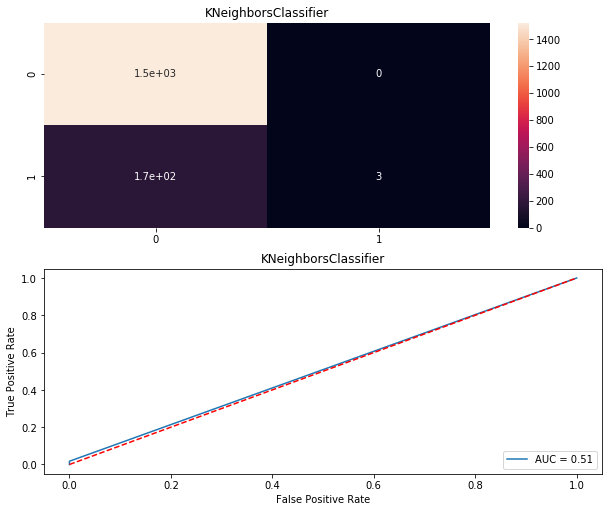

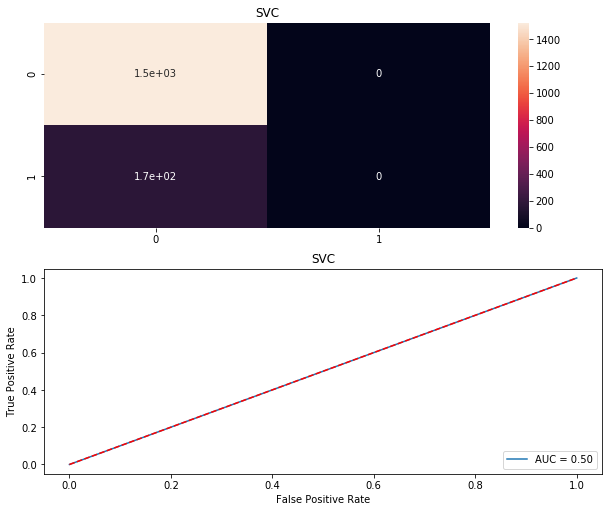

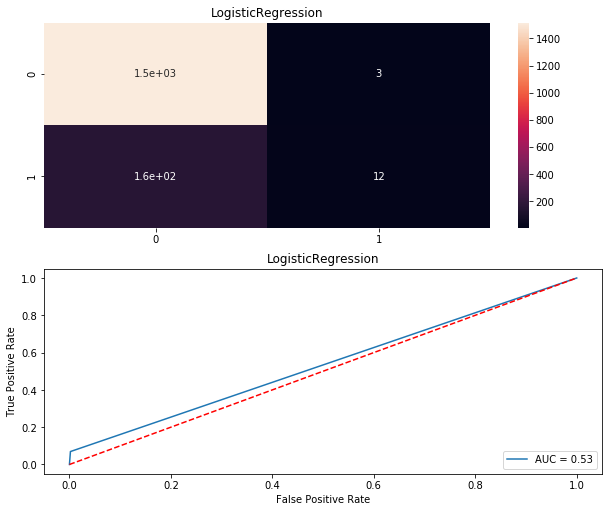

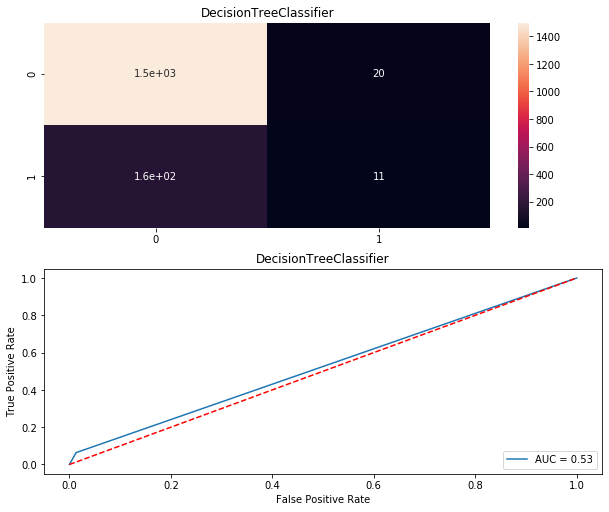

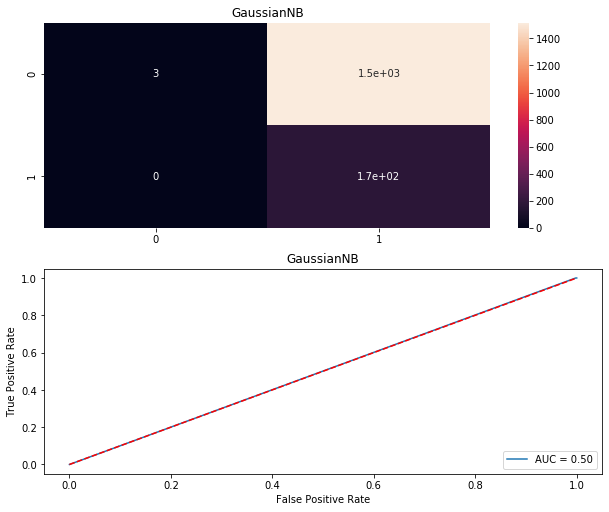

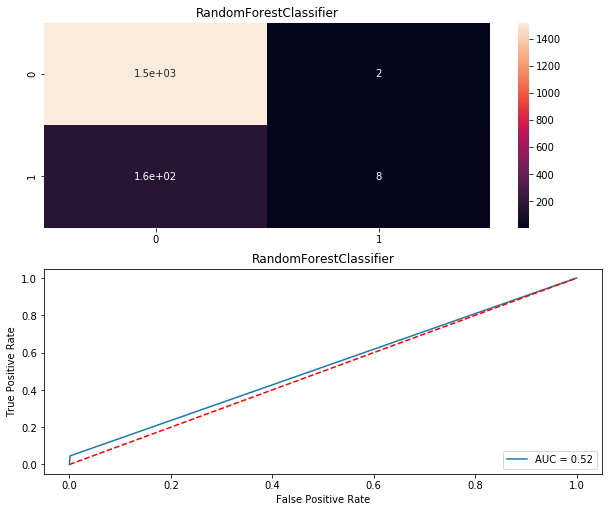

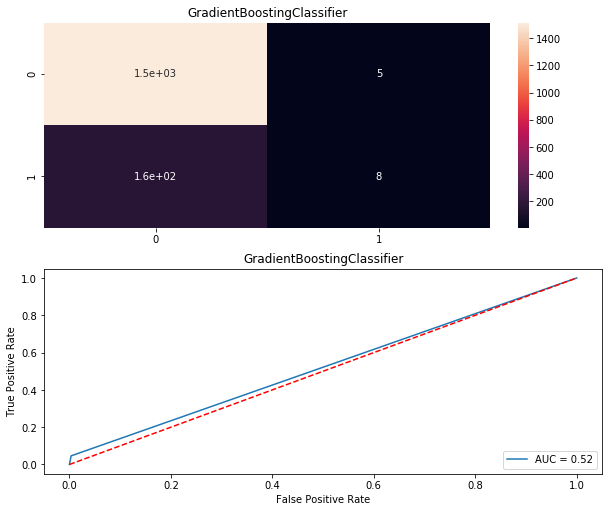

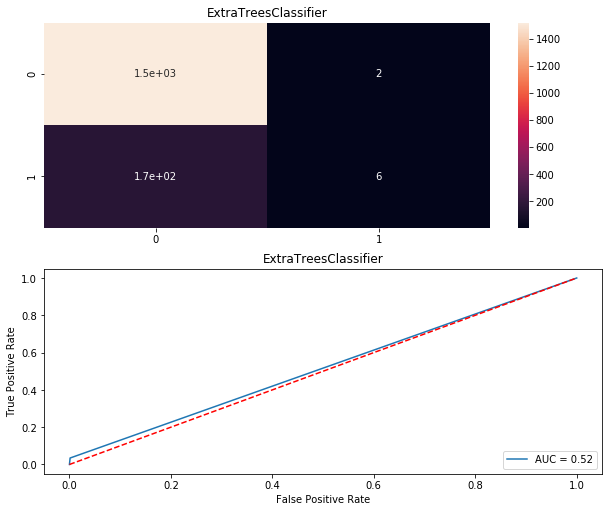

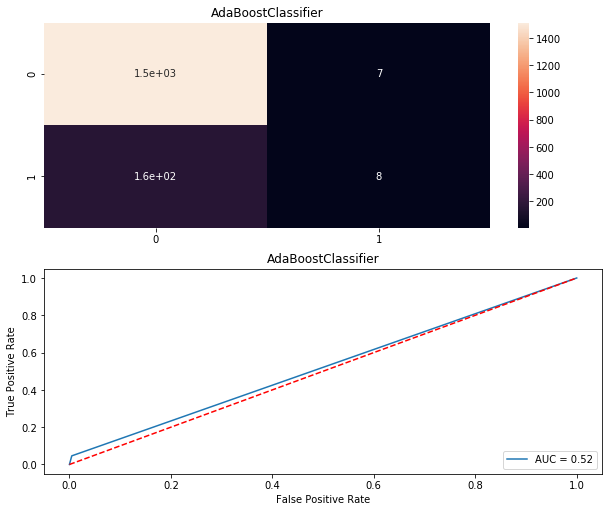

In [51]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [52]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,89.964581,89.670809,50.867052
1,SVC,89.787485,90.113412,50.000000
2,LogisticRegression,90.318772,90.148717,53.369589
3,DecisionTreeClassifier,89.256198,89.351723,52.521729
4,GaussianNB,10.389610,13.302862,50.098619
5,RandomForestClassifier,90.141677,90.095651,52.246393
6,GradientBoostingClassifier,89.964581,90.202253,52.147773
7,ExtraTreesClassifier,90.023613,90.184303,51.668358
8,AdaBoostClassifier,89.846517,90.025011,52.082027


In [ ]:
#We can see that logistic regression is the best suitable model as it has 90.3 % accuracy. 

TASK 2 -  Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [56]:
#Read dataframe
df = pd.read_excel("Brazil covid 19.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [57]:
#Define target 
df['ward_semi_intensive'] = np.where(df['Patient addmited to regular ward (1=yes, 0=no)']
                          + df['Patient addmited to semi-intensive unit (1=yes, 0=no)']
                          + df['Patient addmited to intensive care unit (1=yes, 0=no)']>=1,1,0)

df = df.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','Patient ID'], axis = 1)

In [58]:
#Filter columns with percentage of null >= 99%
df_missing = (df.isna().sum()/len(df)).to_frame()
df_missing =df_missing.rename(columns={0: 'percentage of null'})
print(df_missing[df_missing['percentage of null'] >0.99])

#Drop columns
drop = list(df_missing[df_missing['percentage of null'] >0.99].index)
df = df.drop(drop, axis = 1)

                                           percentage of null
Mycoplasma pneumoniae                                1.000000
Ionized calcium                                      0.991141
Magnesium                                            0.992913
Fio2 (venous blood gas analysis)                     0.999823
Urine - Nitrite                                      0.999823
Urine - Sugar                                        1.000000
Partial thromboplastin time (PTT)                    1.000000
Prothrombin time (PT), Activity                      1.000000
Vitamin B12                                          0.999468
Ferritin                                             0.995925
Arterial Lactic Acid                                 0.995216
Lipase dosage                                        0.998583
D-Dimer                                              1.000000
Albumin                                              0.997697
Hb saturation (arterial blood gases)                 0.995216
pCO2 (ar

Exploratory Data Analysis

Plotting target distribution


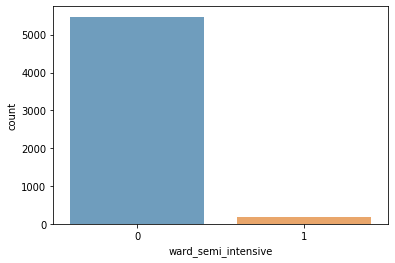

In [59]:
#Target variable
sns.countplot(x=df['ward_semi_intensive'], alpha=0.7, data=df)

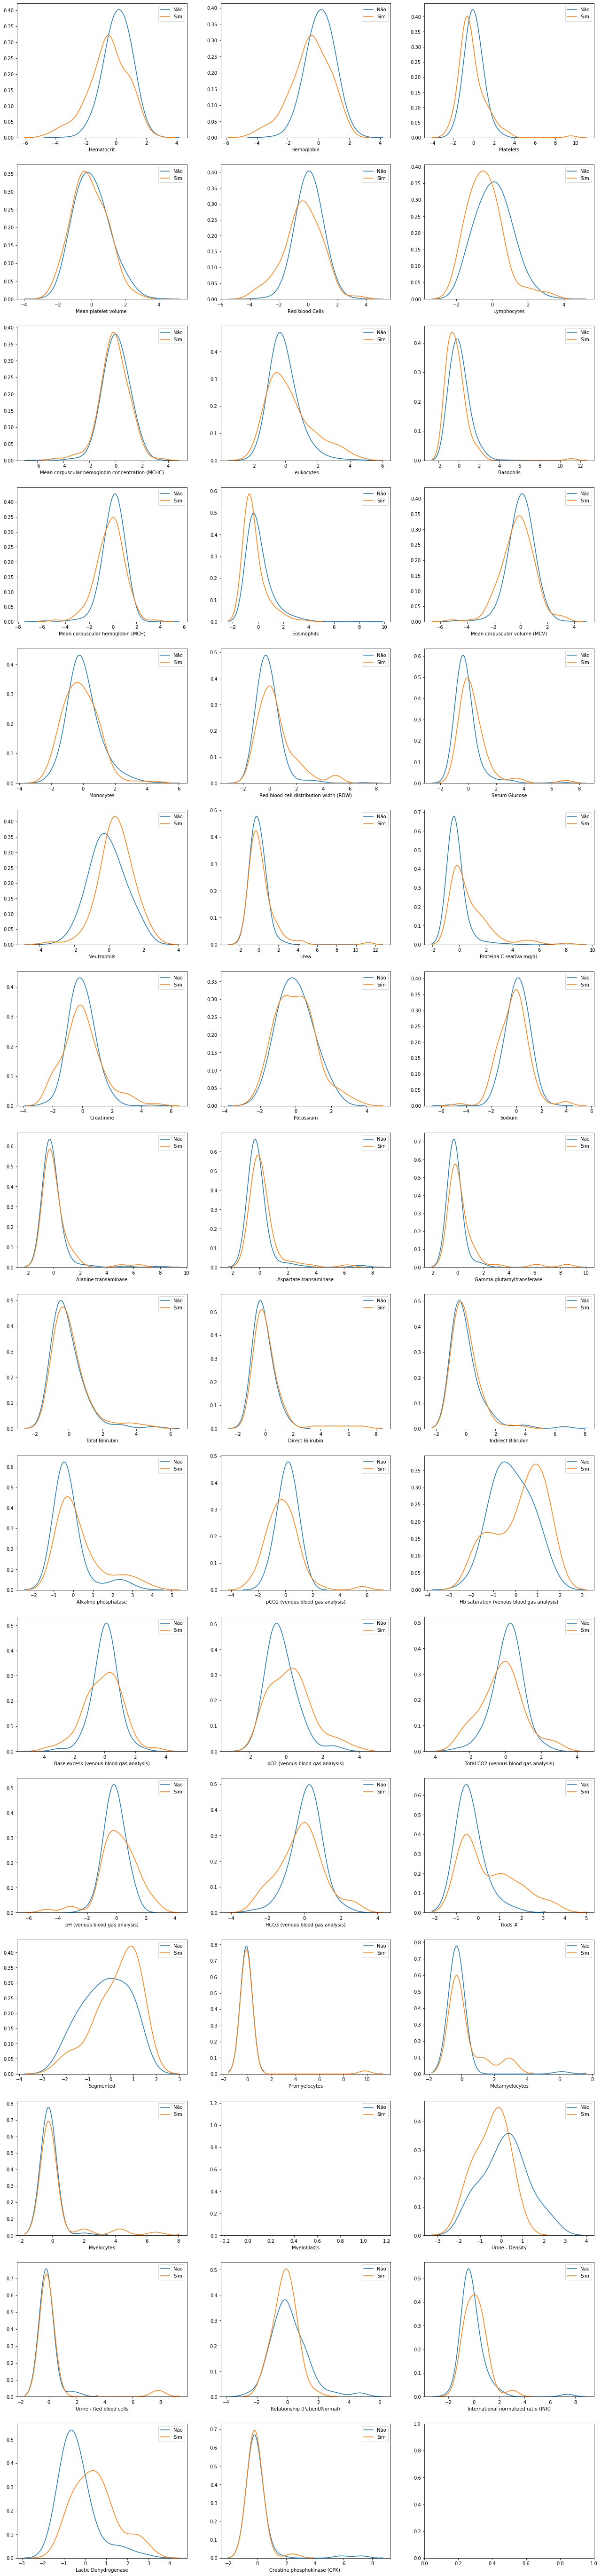

In [60]:
#Plotting the distribution of numerics features

#Plot numerics features 
numerics = ['float32', 'float64']
df2 = df[df['ward_semi_intensive']==0].select_dtypes(include=numerics)
df3 = df[df['ward_semi_intensive']==1].select_dtypes(include=numerics)
fig, ax = plt.subplots(16,3,figsize=(22, 100))
for i, col in enumerate(df2):
    plt.subplot(16,3,i+1)
    plt.xlabel(col, fontsize=10)
    sns.kdeplot(df2[col].values, bw=0.5,label='Não')
    sns.kdeplot(df3[col].values, bw=0.5,label='Sim')
plt.show() 

#Drop null colunms
drop = ['Myeloblasts']
df = df.drop(drop, axis = 1)

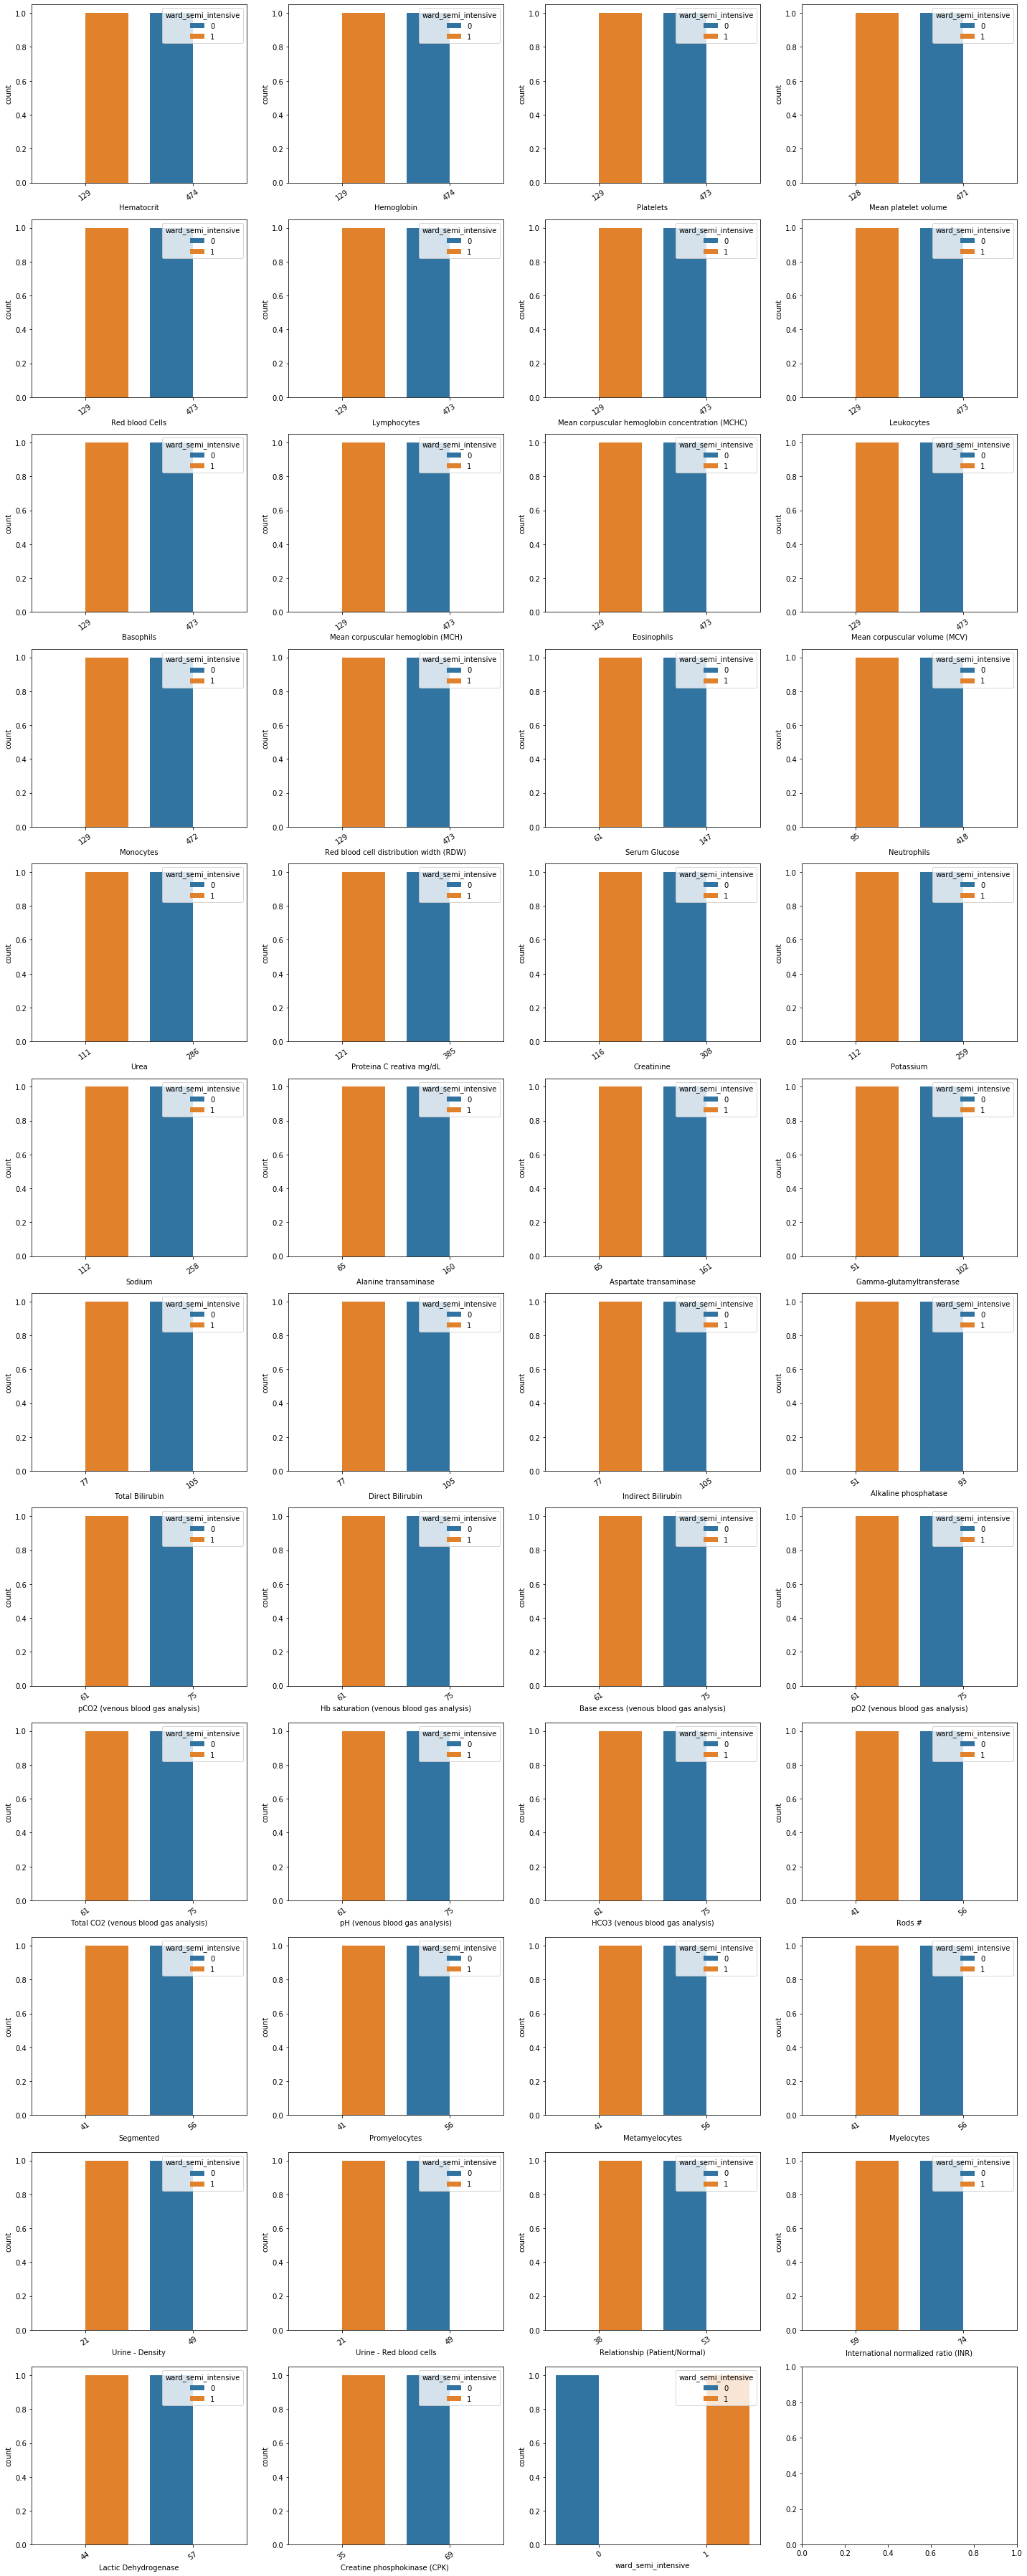

In [61]:
#Plotting the frequency of numerics features


numerics = ['float32', 'float64']
df2 = df[df['ward_semi_intensive']==0].select_dtypes(include=numerics)
df2['ward_semi_intensive'] = 0
df3 = df[df['ward_semi_intensive']==1].select_dtypes(include=numerics)
df3['ward_semi_intensive'] = 1
x = pd.concat([df2,df3])
x = x.groupby('ward_semi_intensive').count()
x['ward_semi_intensive'] = x.index

fig, axes = plt.subplots(round(len(x.columns) / 4), 4, figsize=(20, 50))

for i, ax in enumerate(fig.axes):
    if i < len(x.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=35)
        sns.countplot(x=x.columns[i], data=x,ax=ax,hue='ward_semi_intensive')
fig.tight_layout()



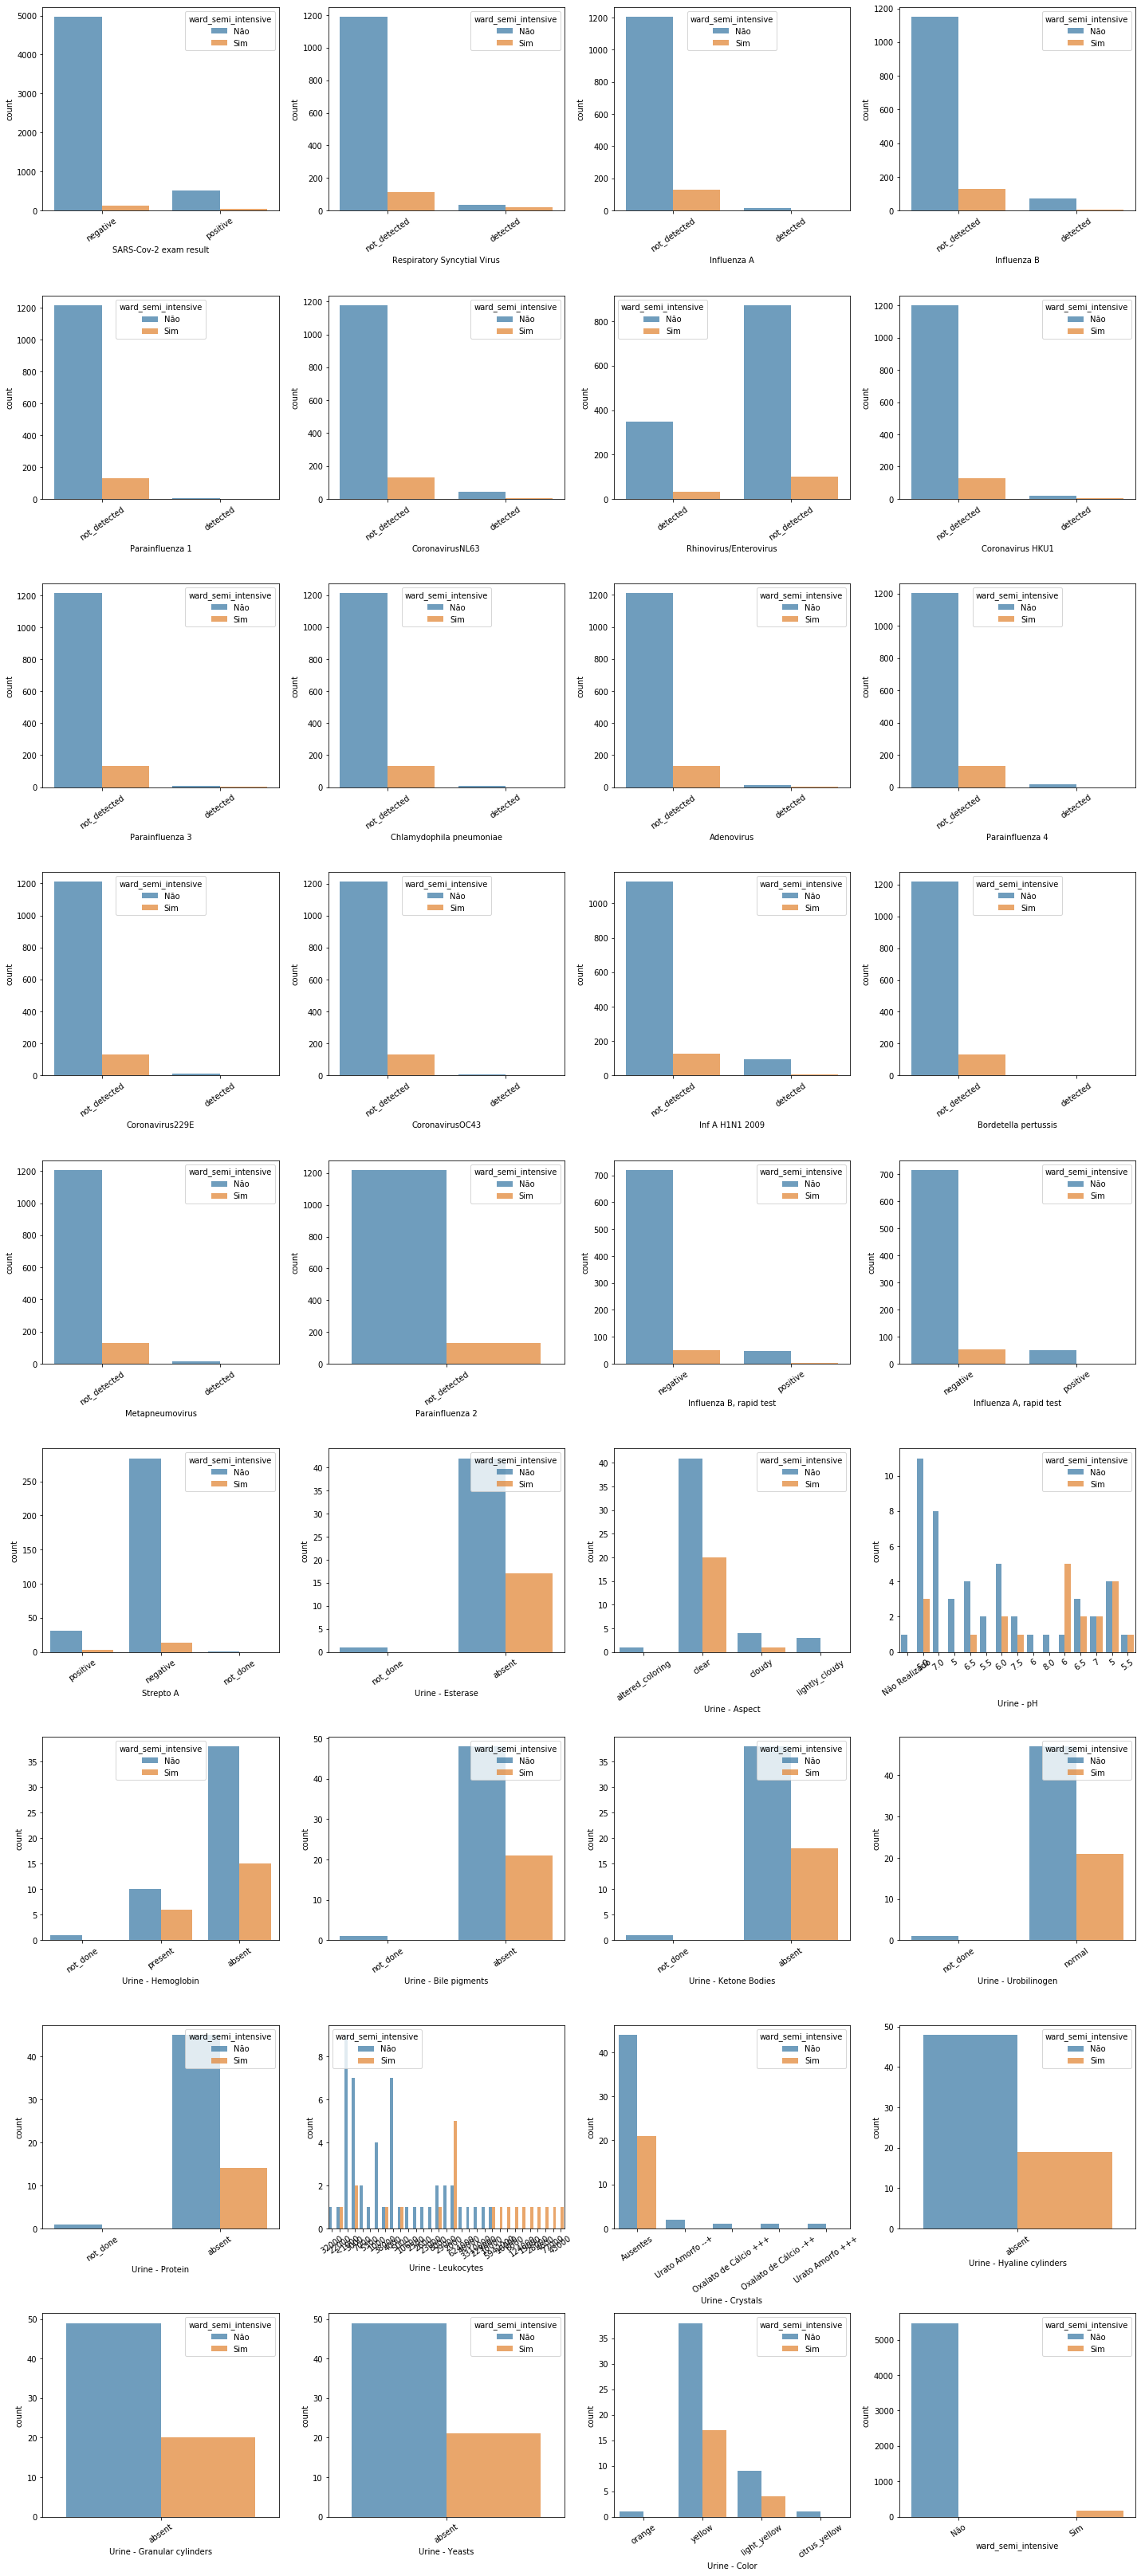

In [62]:
#Plotting the frequency of categorics features

categorics = ['object']
c1 = df[df['ward_semi_intensive']==0].select_dtypes(include=categorics)
c1['ward_semi_intensive'] = 'Não'
c2 = df[df['ward_semi_intensive']==1].select_dtypes(include=categorics)
c2['ward_semi_intensive'] = 'Sim'

c3 = pd.concat([c1,c2])
fig, axes = plt.subplots(round(len(c3.columns) / 4), 4, figsize=(20, 45))

for i, ax in enumerate(fig.axes):
    if i < len(c3.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=35)
        sns.countplot(x=c3.columns[i], alpha=0.7, data=c3, ax=ax,hue="ward_semi_intensive")

fig.tight_layout()

#Drop columns 
drop = ['Adenovirus','Bordetella pertussis', 'Metapneumovirus','Chlamydophila pneumoniae','Inf A H1N1 2009','Urine - Urobilinogen','Urine - Crystals','Urine - Aspect']
df= df.drop(drop,axis=1)


Data Processing

In [63]:
def detect(x):
    df[x] = np.where(df[x] == "detected",1,0)
    return df[x]   

def positive(x):
    df[x] = np.where(df[x] == "positive",1,0)
    return df[x] 

def absent(x):
    df[x] = np.where(df[x] == "absent",1,0)
    return df[x] 

def present(x):
    df[x] = np.where(df[x] == "present",1,0)
    return df[x] 

#Age quantile
df['age_quantile'] = df['Patient age quantile']
df = df.drop('Patient age quantile',axis=1)


#Detected Respiratory Syncytial Virus'
df['Respiratory Syncytial Virus'] = detect('Respiratory Syncytial Virus')

#Detected rhinovirus/Enterovirus
df['Rhinovirus/Enterovirus'] = detect('Rhinovirus/Enterovirus')

#Detected Influenza A or Influenza B
df['Influenza A'] = detect('Influenza A')
df['Influenza B'] = detect('Influenza B')
df['Influenza A, rapid test'] = positive('Influenza A, rapid test')
df['Influenza B, rapid test'] = positive('Influenza B, rapid test')
df['Influenza_A_or_B'] = np.where((df['Influenza A'] + df['Influenza B'] + df['Influenza A, rapid test'] + df['Influenza B, rapid test']) >= 1,1,0)
df = df.drop(['Influenza A','Influenza B','Influenza A, rapid test','Influenza B, rapid test'],axis=1)

#Positive strepto
df['Strepto A'] = positive('Strepto A')


#Detected any Parainfluenza 
df['Parainfluenza 1'] = detect('Parainfluenza 1')
df['Parainfluenza 2'] = detect('Parainfluenza 2')
df['Parainfluenza 3'] = detect('Parainfluenza 3')
df['Parainfluenza 4'] = detect('Parainfluenza 4')
df['Parainflu_detected'] = np.where((df['Parainfluenza 1']+ df['Parainfluenza 2'] + df['Parainfluenza 3']
                                   + df['Parainfluenza 4']) >= 1,1,0)
df = df.drop(['Parainfluenza 1','Parainfluenza 2','Parainfluenza 3','Parainfluenza 4'],axis=1)

#Detected Alpha coronavirus (Coronavirus229E or CoronavirusNL63)
df['Coronavirus229E'] = detect('Coronavirus229E')
df['CoronavirusNL63'] = detect('CoronavirusNL63')
df['Alpha_coronavirus'] = np.where((df['Coronavirus229E'] + df['CoronavirusNL63'] >= 1),1,0)
df = df.drop(['Coronavirus229E','CoronavirusNL63'],axis=1)



#Detected Beta coronavirus (Coronavirus HKU1 or CoronavirusOC43)
df['Coronavirus HKU1'] = detect('Coronavirus HKU1')
df['CoronavirusOC43'] = detect('CoronavirusOC43')
df['Beta_coronavirus'] = np.where((df['CoronavirusOC43'] + df['Coronavirus HKU1'] >= 1),1,0)
df = df.drop(['CoronavirusOC43','Coronavirus HKU1'],axis=1)

#Positive crovid-19
df['SARS-Cov-2 exam result'] = positive('SARS-Cov-2 exam result')

#Remove text of Urine-Ph columns
df['Urine - pH'] = np.where(df['Urine - pH']=='Não Realizado',np.nan,df['Urine - pH'])
df['Urine - pH'] = df['Urine - pH'].astype(float)

#Absent Urine - Bile pigments
df['Urine_Bile_pigments_absent'] = absent('Urine - Bile pigments')
df = df.drop('Urine - Bile pigments',axis=1)



#Absent 'Urine - Ketone Bodies'
df['Urine_Ketone_Bodies_absent'] = absent('Urine - Ketone Bodies')
df = df.drop('Urine - Ketone Bodies',axis=1)

#Absent  'Urine - Hyaline cylinders'
df['Urine_Hyaline_cylinders_absent'] = absent('Urine - Hyaline cylinders')
df = df.drop('Urine - Hyaline cylinders',axis=1)

#Absent 'Urine - Yeasts'
df['Urine_Yeasts_absent'] = absent('Urine - Yeasts')
df = df.drop('Urine - Yeasts',axis=1)

#Absent 'Urine - Protein'
df['Urine_Protein_absent'] = absent('Urine - Protein')
df = df.drop('Urine - Protein',axis=1)


#Absent 'Urine - Esterase'
df['Urine_Esterase_absent'] = absent('Urine - Esterase')
df = df.drop('Urine - Esterase',axis=1)

#Absent 'Urine -  Granular cylinders'
df['Urine_Granular_cylinders_absent'] = absent('Urine - Granular cylinders')
df = df.drop('Urine - Granular cylinders',axis=1)

#Urine - Leukocytes
df['Urine - Leukocytes'].replace('<', '', regex = True,inplace=True)
df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype(float)

#Urine - Hemoglobin present and ausent
df['Urine_Hemoglobin_present'] = present('Urine - Hemoglobin')
df['Urine_Hemoglobin_present'] = absent('Urine - Hemoglobin')
df = df.drop('Urine - Hemoglobin',axis=1)


#Urine yellow or light yellow
df['Urine_yellow']= np.where(df['Urine - Color']=='yellow',1,0)
df['Urine_light_yellow']= np.where(df['Urine - Color']=='light_yellow',1,0)
df['Urine_color_yellow'] = np.where(df['Urine_yellow'] + df['Urine_light_yellow'] >=1,1,0)
df = df.drop(['Urine - Color','Urine_yellow','Urine_light_yellow'],axis=1)

#code to fix columns name
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

#Input median in null values 
numerics = ['float32', 'float64']
df2 = df.select_dtypes(include=numerics).apply(lambda x: x.fillna(x.median()),axis=0)

drop_columns = []
for i in df2.columns:
    drop_columns.append(i)
df = df.drop(drop_columns, axis = 1) 

df = pd.concat([df, df2], axis=1, sort=False)
df.head(5)


,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Rhinovirus/Enterovirus,Strepto A,ward_semi_intensive,age_quantile,Influenza_A_or_B,Parainflu_detected,Alpha_coronavirus,Beta_coronavirus,Urine_Bile_pigments_absent,Urine_Ketone_Bodies_absent,Urine_Hyaline_cylinders_absent,Urine_Yeasts_absent,Urine_Protein_absent,Urine_Esterase_absent,Urine_Granular_cylinders_absent,Urine_Hemoglobin_present,Urine_color_yellow,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - pH,Urine - Density,Urine - Leukocytes,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK)
0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,-0.329835,0.066045,-0.115191,-0.182790,-0.292070,-0.053642,-0.141742,-0.394284,-0.081113,-0.058626,0.143752,-0.28361,-0.278326,-0.285685,-0.174908,-0.003205,-0.278654,-0.3576,0.013734,0.090369,0.080306,-0.21263,0.104088,-0.090881,0.100957,-0.624373,0.175932,-0.102062,-0.315965,-0.233126,6.0,-0.054732,4000.0,-0.193921,-0.089481,-0.156144,-0.33084,-0.22475
1,0,0,1,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,-0.28361,-0.278326,-0.285685,-0.174908,-0.003205,-0.278654,-0.3576,0.013734,0.090369,0.080306,-0.21263,0.104088,-0.090881,0.100957,-0.624373,0.175932,-0.102062,-0.315965,-0.233126,6.0,-0.054732,4000.0,-0.193921,-0.089481,-0.156144,-0.33084,-0.22475
2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,-0.329835,0.066045,-0.115191,-0.182790,-0.292070,-0.053642,-0.141742,-0.394284,-0.081113,-0.058626,0.143752,-0.28361,-0.278326,-0.285685,-0.174908,-0.003205,-0.278654,-0.3576,0.013734,0.090369,0.080306,-0.21263,0.104088,-0.090881,0.100957,-0.624373,0.175932,-0.102062,-0.315965,-0.233126,6.0,-0.054732,4000.0,-0.193921,-0.089481,-0.156144,-0.33084,-0.22475
3,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,-0.329835,0.066045,-0.115191,-0.182790,-0.292070,-0.053642,-0.141742,-0.394284,-0.081113,-0.058626,0.143752,-0.28361,-0.278326,-0.285685,-0.174908,-0.003205,-0.278654,-0.3576,0.013734,0.090369,0.080306,-0.21263,0.104088,-0.090881,0.100957,-0.624373,0.175932,-0.102062,-0.315965,-0.233126,6.0,-0.054732,4000.0,-0.193921,-0.089481,-0.156144,-0.33084,-0.22475
4,0,0,1,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,-0.329835,0.066045,-0.115191,-0.182790,-0.292070,-0.053642,-0.141742,-0.394284,-0.081113,-0.058626,0.143752,-0.28361,-0.278326,-0.285685,-0.174908,-0.003205,-0.278654,-0.3576,0.013734,0.090369,0.080306,-0.21263,0.104088,-0.090881,0.100957,-0.624373,0.175932,-0.102062,-0.315965,-0.233126,6.0,-0.054732,4000.0,-0.193921,-0.089481,-0.156144,-0.33084,-0.22475


In [64]:
#Check and print the correlation between features and target variable1 (top 10 positive correlations)
#Weak positive correlation
df.corr(method='spearman')['ward_semi_intensive'].sort_values(ascending=False).head(11)

ward_semi_intensive                1.000000
Proteina C reativa mg/dL           0.285144
Rods #                             0.282162
Metamyelocytes                     0.227212
Respiratory Syncytial Virus        0.189154
Urine_color_yellow                 0.180071
Urine_Bile_pigments_absent         0.178494
Urine_Yeasts_absent                0.176948
Urine_Ketone_Bodies_absent         0.170619
Urine_Granular_cylinders_absent    0.169060
Urine_Hyaline_cylinders_absent     0.162540
Name: ward_semi_intensive, dtype: float64

Train/Test Split

In [65]:
#Split feature x and target y 
x = df.drop('ward_semi_intensive',axis=1)
y = df['ward_semi_intensive']

#30% test e 70% train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [66]:
rf = RandomForestClassifier(max_depth=5, random_state=42,n_estimators=100,class_weight = 'balanced')
rf.fit(x_train,y_train)
p2 = rf.predict(x_test)
print('accuracy:' , accuracy_score(p2,y_test))
print('f1_score:' , f1_score(p2,y_test,average='weighted'))


accuracy: 0.9504132231404959
f1_score: 0.9431452172251361


In [67]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear',penalty="l1")
lr.fit(x_train,y_train)
p3 = lr.predict(x_test)
print('accuracy:' , accuracy_score(p3,y_test))
print('f1_score:' , f1_score(p3,y_test,average='weighted'))

accuracy: 0.9126328217237308
f1_score: 0.8918534969149883


In [68]:
svm = SVC(gamma='auto',random_state=42)
svm.fit(x_train, y_train)
p5 = svm.predict(x_test)
print('f1_score:' , f1_score(p5,y_test,average='weighted'))
print('accuracy:' , accuracy_score(p5,y_test))

f1_score: 0.9806496958650067
accuracy: 0.9687131050767415


In [69]:
#Using Xgboost to predict admission to general ward, semi-intensive unit or intensive care 
xgboost = xgb.XGBClassifier(learning_rate = 0.2
                            ,max_depth = 5
                            ,colsample_bytree = 0.9
                            ,n_estimators = 100
                            ,random_state=42
                            ,class_weight='balanced'
                           )

xgboost.fit(x_train,y_train)
p = xgboost.predict(x_test)
print('f1_score:' , f1_score(p,y_test,average='weighted'))
print('accuracy:' , accuracy_score(p,y_test))

f1_score: 0.983355596079561
accuracy: 0.9811097992916175


In [85]:
#here xgb gives the highest accuracy with 98.33%

In [70]:
#Filter feauture with importance > 0.015
feature = []
aux= []
for feature in zip(x_train, xgboost.feature_importances_):
    if feature[1] > 0.015:
        aux.append(feature[0])
        print(feature)

('SARS-Cov-2 exam result', 0.030886801)
('Respiratory Syncytial Virus', 0.01725742)
('Hematocrit', 0.019768747)
('Hemoglobin', 0.035099205)
('Red blood Cells', 0.02301034)
('Lymphocytes', 0.019808738)
('Eosinophils', 0.05993838)
('Red blood cell distribution width (RDW)', 0.035782486)
('Serum Glucose', 0.015996536)
('Proteina C reativa mg/dL', 0.12349428)
('Total Bilirubin', 0.01696619)
('pCO2 (venous blood gas analysis)', 0.053496446)
('Hb saturation (venous blood gas analysis)', 0.062350757)
('Base excess (venous blood gas analysis)', 0.015667053)
('pH (venous blood gas analysis)', 0.031815756)
('Rods #', 0.020474212)
('Segmented', 0.034622055)
('Urine - Red blood cells', 0.021612681)
('Relationship (Patient/Normal)', 0.041834015)
('International normalized ratio (INR)', 0.03546253)
('Lactic Dehydrogenase', 0.0390946)
('Creatine phosphokinase\xa0(CPK)\xa0', 0.016984627)


In [78]:
stacking = VotingClassifier(estimators=[
    ('rf', rf), ('lr',lr),('xgboost',xgboost),('svm',svm)], voting='hard')
stacking.fit(x_train, y_train)
p4 = stacking.predict(x_test)
print('f1_score:' , f1_score(p4,y_test,average='weighted'))
print('accuracy:' , accuracy_score(p4,y_test))
print(classification_report(p4,y_test))

f1_score: 0.983846251582868
accuracy: 0.9799291617473436
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1670
           1       0.41      0.96      0.57        24

    accuracy                           0.98      1694
   macro avg       0.71      0.97      0.78      1694
weighted avg       0.99      0.98      0.98      1694



In [79]:
print('f1_score:' , f1_score(p4,y_test,average='weighted'))
print('accuracy:' , accuracy_score(p4,y_test))

f1_score: 0.983846251582868
accuracy: 0.9799291617473436


In [84]:
#save the model
from sklearn.externals import joblib
joblib.dump(xgboost,"model_Brazil.pkl")

['model_Brazil.pkl']